In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# 第一题
20只股票趋势统计

/home/nocater/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel/__main__.py:31: RuntimeWarning: divide by zero encountered in log


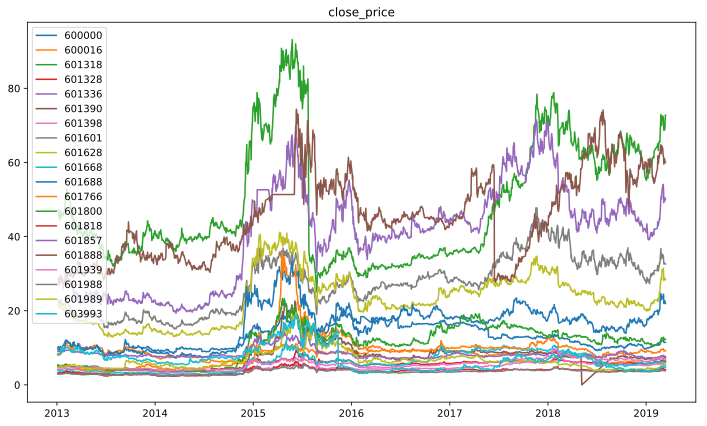

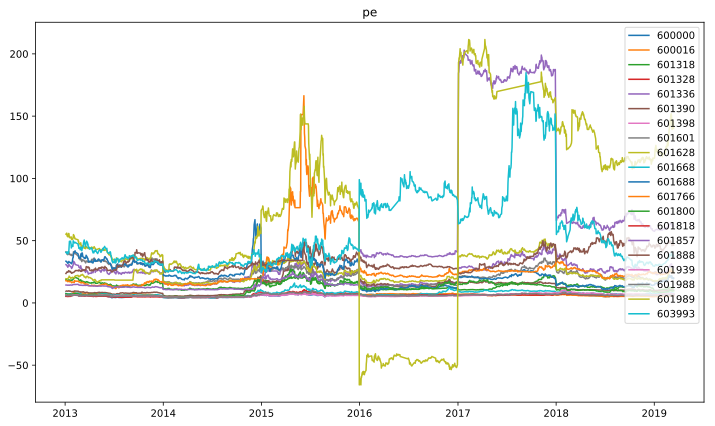

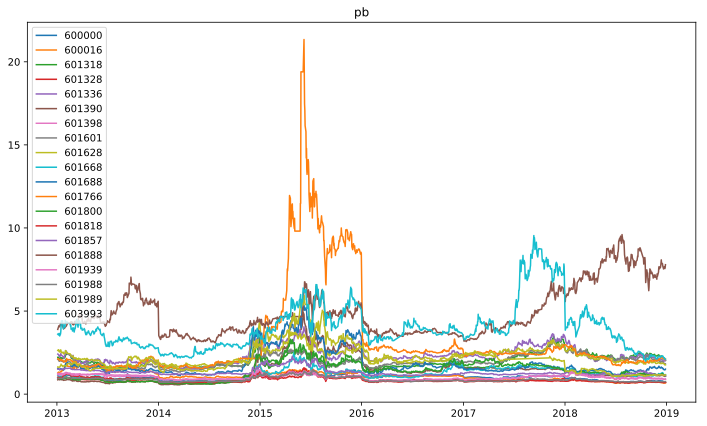

In [34]:
%config InlineBackend.figure_format = 'svg'

import os
path = r'./data/'

colors = plt.cm.Spectral(np.arange(20))


stocks = []
close = []
pes = []
pbs = []
log_incomes = []

for file in os.listdir(path):
    if '~' in file : continue
    df = pd.read_excel(path+file)
    df.columns = ['date', 'date2', 'open', 'max', 'min', 'close', 'done', 'market_value', 'turnover', 'pe', 'pb']
    df.loc[:, 'date'] = pd.to_datetime(df.date)
    df = df.set_index('date')
    df = df.iloc[:, 1:]
    
    df['42d'] = np.round(df.close.rolling(window= 42).mean(), 2)
    df['252d'] = np.round(df.close.rolling(window= 252).mean(), 2)
    df['42-252'] = df['42d'] - df['252d']
    SD = 0
    df['signal'] = np.where(df['42-252'] > SD, 1, 0)
    df['signal'] = np.where(df['42-252'] < -SD, -1, df['signal'])
    df['market'] = (df['close']/df['close'].shift(1))- 1.0
    df['income'] = df['signal'].shift(1) * df['market']
    df['log_market'] = np.log(df['close']/df['close'].shift(1))
    df['log_income'] = df['signal'].shift(1) * df['log_market']
    df[['log_income']].cumsum()
    
    stocks.append(file.split('.')[0])
    close.append(dict(zip(df.index.values, df.close.values)))
    pes.append(dict(zip(df.index.values, df.pe.values)))
    pbs.append(dict(zip(df.index.values, df.pb.values)))
    log_incomes.append(dict(zip(df.index.values, df.log_income.cumsum().values)))

plt.figure(figsize=(12,7))
for i in range(20):
    plt.plot(close[i].keys(),close[i].values(),label=stocks[i])
plt.title('close_price')
plt.legend()
plt.show()

plt.figure(figsize=(12,7))
for i in range(20):
    plt.plot(pes[i].keys(),pes[i].values(),label=stocks[i])
plt.legend()
plt.title('pe')
plt.show()

20只股票的log_income分析

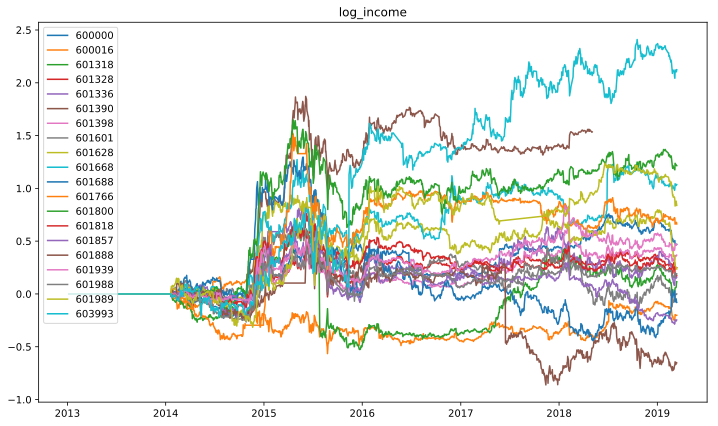

In [41]:
plt.figure(figsize=(12,7))
for i in range(20):
    plt.plot(log_incomes[i].keys(),log_incomes[i].values(),label=stocks[i])
plt.title('log_income')
plt.legend(loc='upper left')
plt.show()

600000
600016
601318
601328
601336
601390


/home/nocater/anaconda3/envs/ml/lib/python3.6/site-packages/ipykernel/__main__.py:51: RuntimeWarning: divide by zero encountered in log


601398
601601
601628
601668
601688
601766
601800
601818
601857
601888
601939
601988
601989
603993


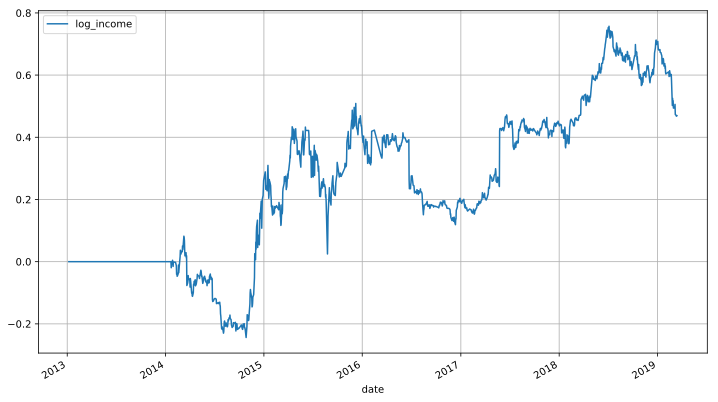

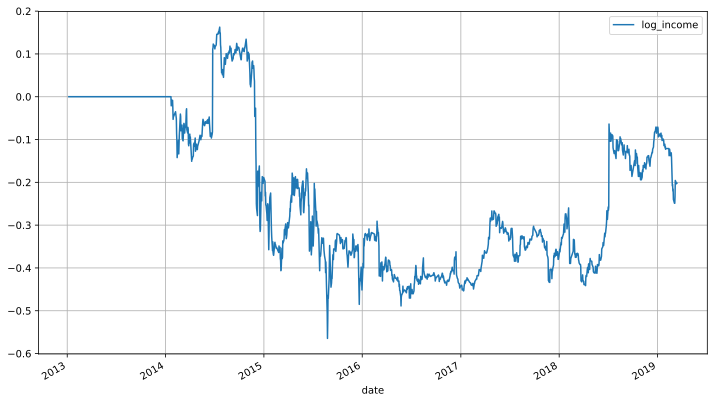

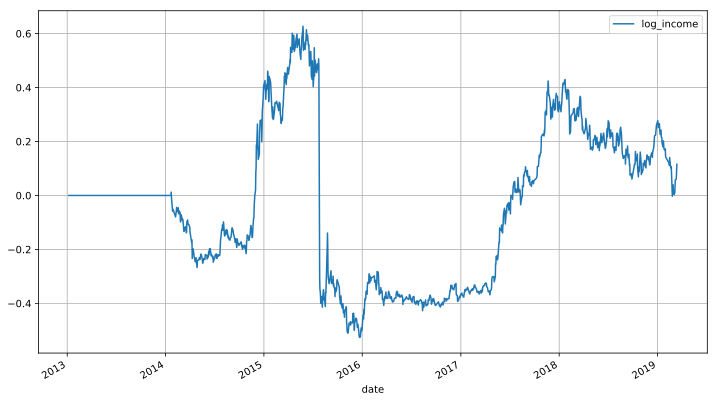

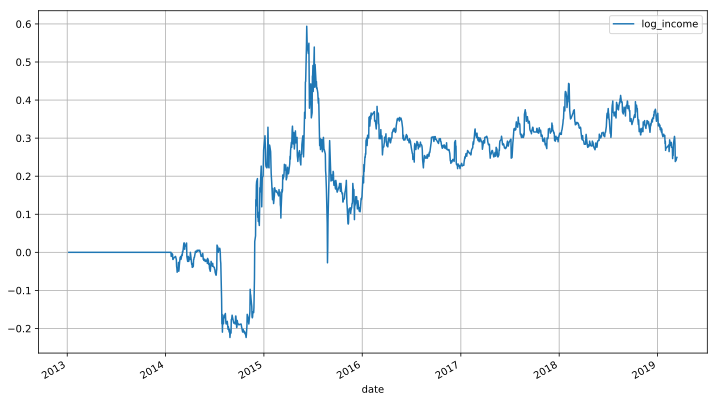

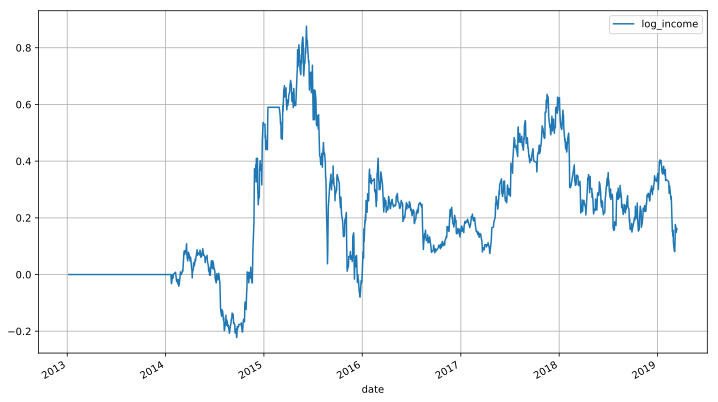

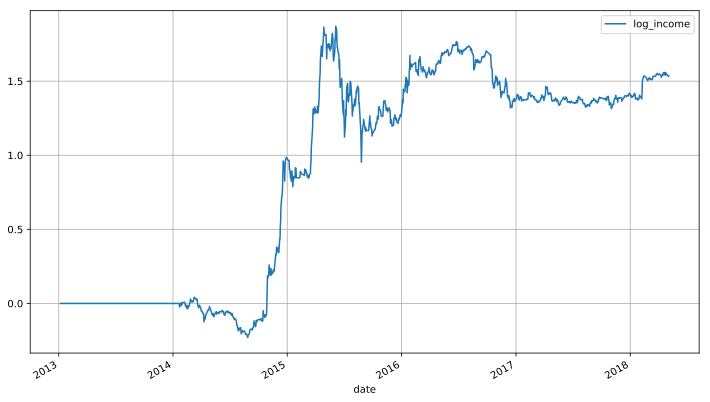

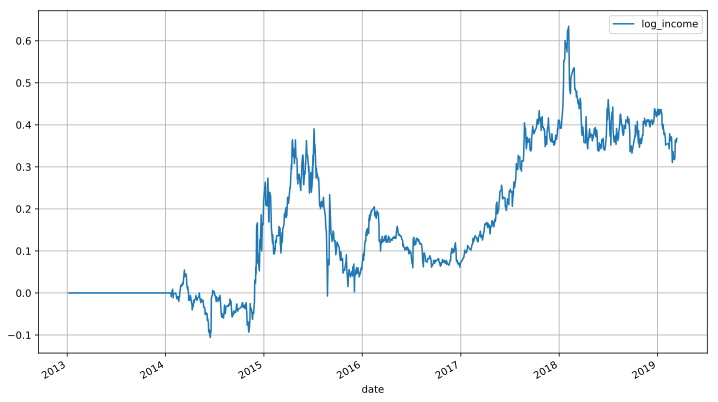

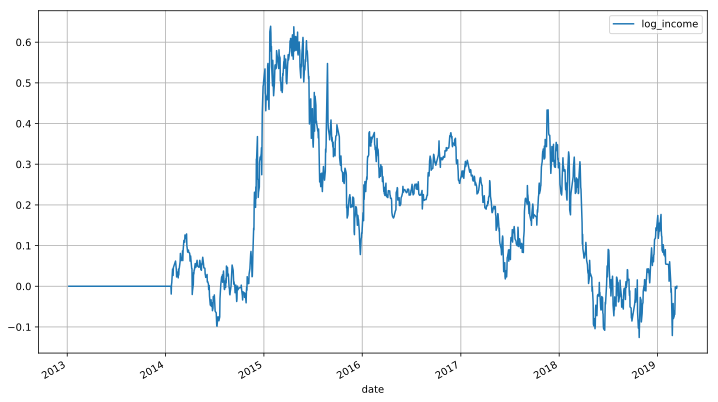

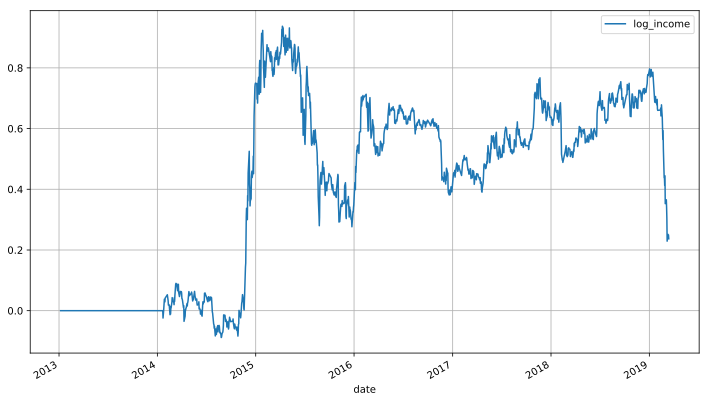

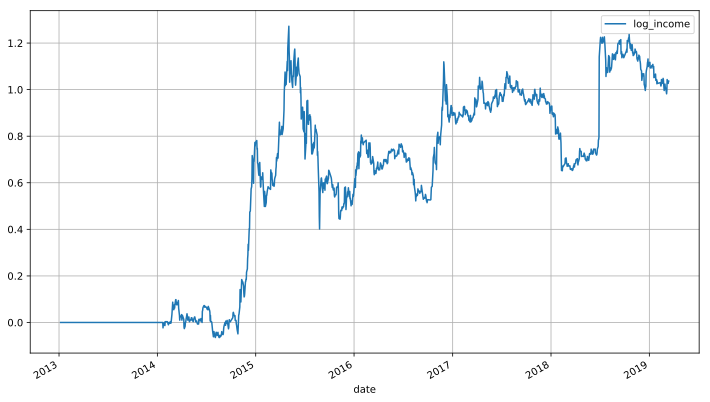

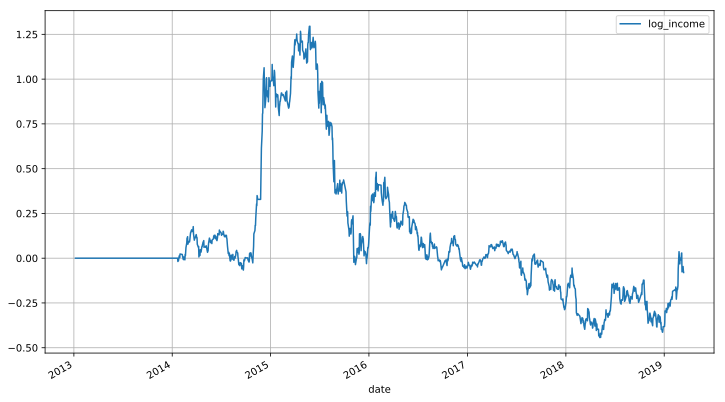

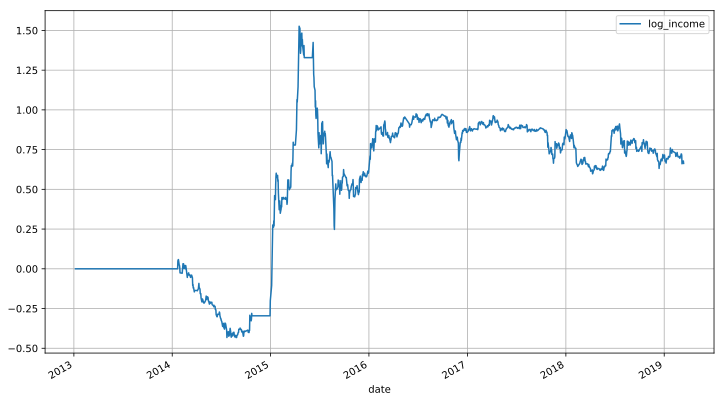

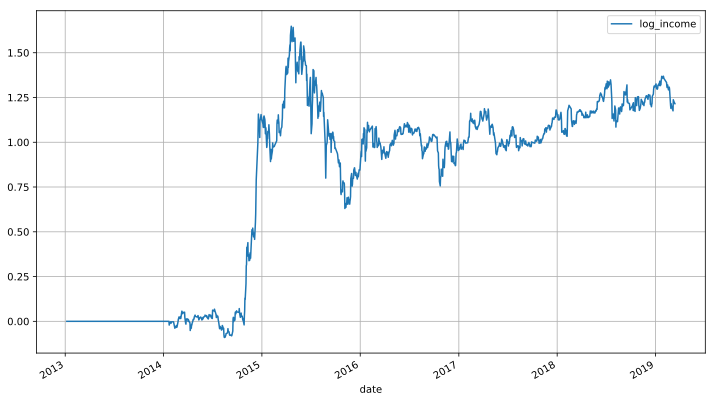

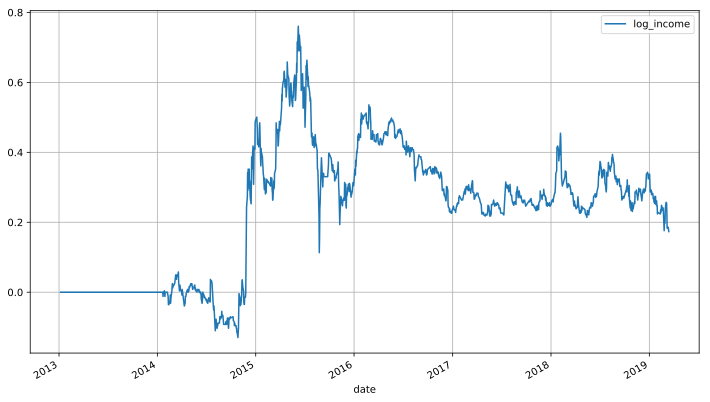

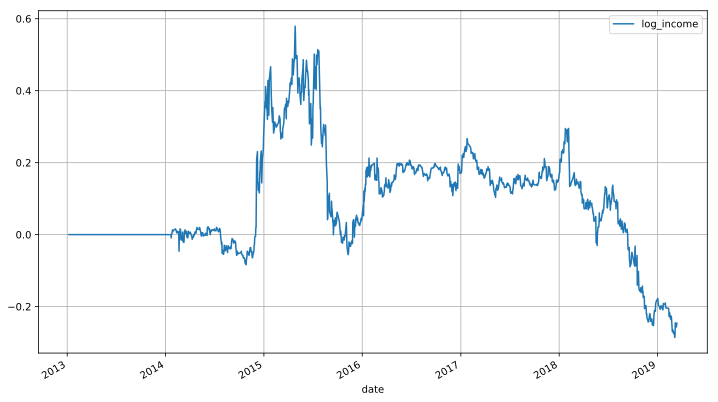

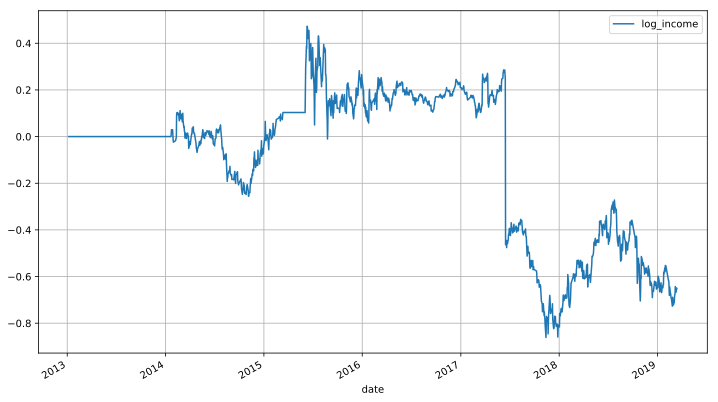

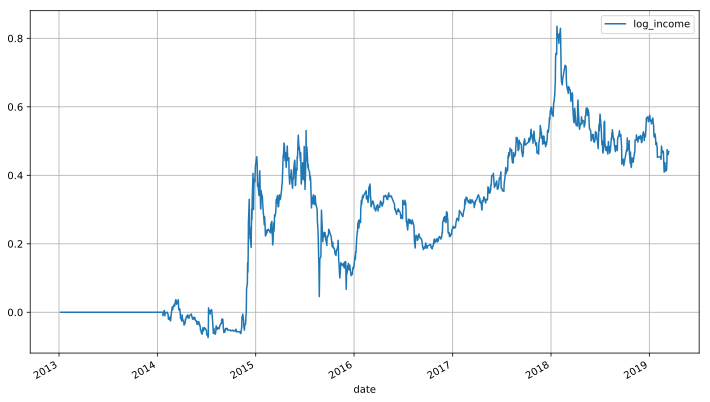

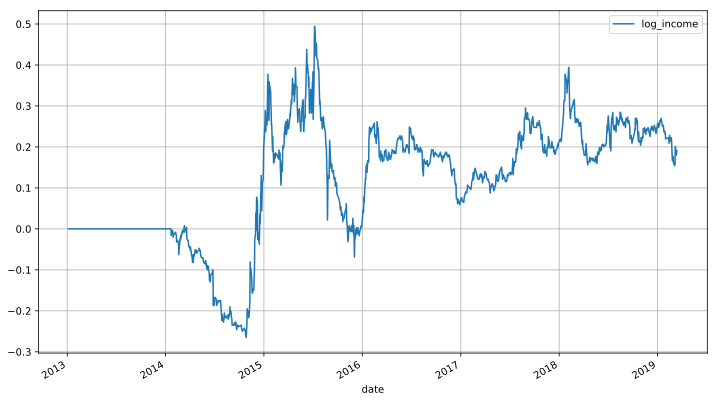

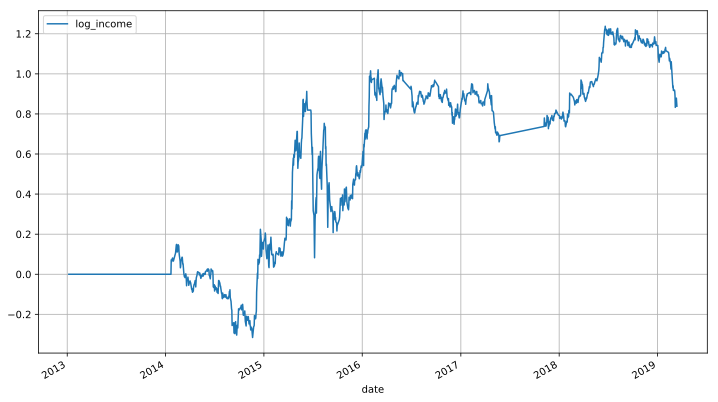

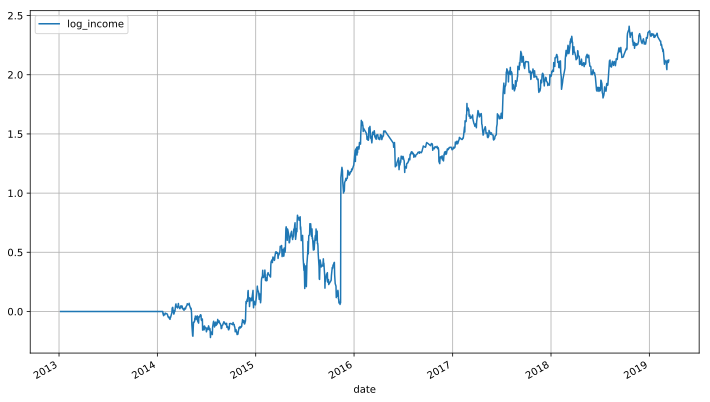

In [43]:
import os
path = r'./data/'

log_market = []

for file in os.listdir(path):
    if '~' in file : continue
    df = pd.read_excel(path+file)
    df.columns = ['date', 'date2', 'open', 'max', 'min', 'close', 'done', 'market_value', 'turnover', 'pe', 'pb']
    df.loc[:, 'date'] = pd.to_datetime(df.date)
    df = df.set_index('date')
    df = df.iloc[:, 1:]
     
    # 1 
    #实现两个趋势策略,期间指数水平移动平均数,分别是两个月(42天),一年(252天).一年只有252个交易日
    # pandas可以简单实现移动平均值的计算
    # np.round(),对序列中的数据按照指定的精度进行四舍五入
    # pd.rolling_mean() 计算移动平均值,这是老语法
    # 新操作: Series.rolling(window= 42).mean()
    df['42d'] = np.round(df.close.rolling(window= 42).mean(), 2)
    df['252d'] = np.round(df.close.rolling(window= 252).mean(), 2)
#     df[['open','42d', '252d']].plot(figsize=(12,7))
    
    # 2 
    #基于这些数据,可以设计一些规则来生简单的成趋势信号
    # 卖出信号
    # 42天平均线第一次高于252天平均线SD(平均值差值的阈值)点
    # 等待(持币)
    # 42天平均线在252天平均线的+-SD点范围内
    # 买入信号
    #在sz50上添加一个新的列,两个平均数据的差值,'42-252',因为两个均值的区间不同,所以数量上是不相等的,缺失的部分为Nan
    df['42-252'] = df['42d'] - df['252d']
    # print(df[['close','42d','252d','42-252']].tail())
    
    # 设置信号阈值SD,增加一个新列signal
    # np.where(condition,x,y)有三个参数,第一个为判断条件,也可为bool,
    # 条件为真时返回x,否则y
    # 官方文档中np.where跟详细的介绍:https://docs.scipy.org/doc/numpy/reference/generated/numpy.where.html
    SD = 0
    df['signal'] = np.where(df['42-252'] > SD, 1, 0)
    df['signal'] = np.where(df['42-252'] < -SD, -1, df['signal'])
    # print(df['signal'].value_counts())
    # df['signal'].plot(grid=True,figsize=(10,5))
    
    # 收益率或log收益率 两种结果差异很小
    # ln 数据更加平滑，克服数据异方差 
    # ln 能勾搭到价格上涨下降的对称性(数据对称性)
    df['market'] = (df['close']/df['close'].shift(1))- 1.0
    df['income'] = df['signal'].shift(1) * df['market']
    # 对数收益率
    df['log_market'] = np.log(df['close']/df['close'].shift(1))
    df['log_income'] = df['signal'].shift(1) * df['log_market']
#     df['log_income'].plot(grid=True, figsize=(10,6),alpha=0.5,c='red')

    # 每天的累积收益
#     df[['market','log_market','income','log_income']].cumsum().plot(grid=True, figsize=(15,7))
    df[['log_income']].cumsum().plot(grid=True, figsize=(12,7))
    
    # 累积收益 用于第一题第一小问
    log_market.append(df.log_income.values)
    # 累计收益率
    # 累计收益率cum_return(t) = daily_return(t－１）*(1.0+daily_return(t))
    df['accu_returns'] = (df['market'][:-1]*(1.0+df['market'].shift(1)[1:]))
#     df['accu_returns'].plot(grid=True, figsize=(10,6))
                          
    print(file.split('.')[0])

# 第一题第二小问
MACD(Moving Average Convergence / Divergence)
取滑动平均为21天(股票每月21个交易日)

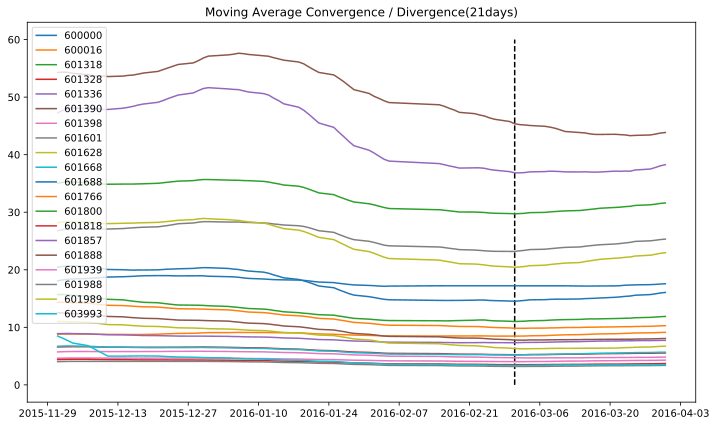

In [118]:
import os
path = r'./data/'

del stock
del macds
stock = []
macds = []
for file in os.listdir(path):
    name = file.split('.')[0]
    stock.append(name)
    if '~' in file : continue
    df = pd.read_excel(path+file)
    df.columns = ['date', 'date2', 'open', 'max', 'min', 'close', 'done', 'market_value', 'turnover', 'pe', 'pb']
    df.loc[:, 'date'] = pd.to_datetime(df.date)
    df = df.set_index('date')
    df = df.iloc[:, 1:]
    
    # 1 
    #实现两个趋势策略,期间指数水平移动平均数,分别是两个月(42天),一年(252天).一年只有252个交易日
    # pandas可以简单实现移动平均值的计算
    # np.round(),对序列中的数据按照指定的精度进行四舍五入
    # pd.rolling_mean() 计算移动平均值,这是老语法
    # 新操作: Series.rolling(window= 42).mean()
    df['21d'] = np.round(df.close.rolling(window= 21).mean(), 2)
    df['252d'] = np.round(df.close.rolling(window= 252).mean(), 2)
#     df['42d'].plot(figsize=(12,7))
    df = df['2015-12':'2016-3']
#     df['21d'].plot(title='Moving Average Divergence(21day)',figsize=(12,7))
    
    macds.append(dict(zip(df.index.values, df['21d'].values)))
    
plt.figure(figsize=(12,7))
for i in range(20):
    plt.plot(macds[i].keys(),macds[i].values(),label=stocks[i])
    
plt.vlines('2016-3-1', 0, 60, colors = "black", linestyles = "dashed")
plt.legend(loc='upper left')
plt.title('Moving Average Convergence / Divergence(21days)')
plt.show()

# 事后诸葛亮进行判读
最大收益：601336 8.52 41.92(max) 33.4(min)

In [119]:
import os
path = r'./data/'

macds = []
for file in os.listdir(path):
    name = file.split('.')[0]
    if '~' in file : continue
    df = pd.read_excel(path+file)
    df.columns = ['date', 'date2', 'open', 'high', 'low', 'close', 'done', 'market_value', 'turnover', 'pe', 'pb']
    df.loc[:, 'date'] = pd.to_datetime(df.date)
    df = df.set_index('date')
    df = df.iloc[:, 1:]
    
    df = df['2016-3': '2016-3-31']
    if not pd.to_datetime('2016-3-1') in df.index: continue
    min_ = df.loc['2016-3-1','low']
    max_ = df.high.max()
    print(name, np.round(max_-min_,2))

600016 1.21 9.56 8.35
601318 5.24 33.8 28.56
601328 0.69 5.79 5.1
601336 8.52 41.92 33.4
601390 1.45 8.66 7.21
601398 0.43 4.41 3.98
601601 3.92 26.93 23.01
601628 5.12 24.82 19.7
601668 0.91 6.03 5.12
601688 4.55 18.0 13.45
601766 1.71 10.92 9.21
601800 2.65 13.11 10.46
601818 0.46 3.82 3.36
601857 0.77 7.94 7.17
601888 6.28 47.56 41.28
601939 0.45 4.95 4.5
601988 0.31 3.46 3.15
601989 1.88 7.68 5.8
603993 0.55 3.75 3.2


# KDJ 计算

KDJ的基本使用方法：

- K 线是快速确认线——数值在90以上为超买,数值在10以下为超卖;

- D线是慢速主干线——数值在80以上为超买,数值在20以下为超卖;

- J线为方向敏感线, 当J值大于100,特别是连续5天以上,股价至少会形成短期头部,反之J值小于0时,特别是连续数天以上,股价至少会形成短期底部。

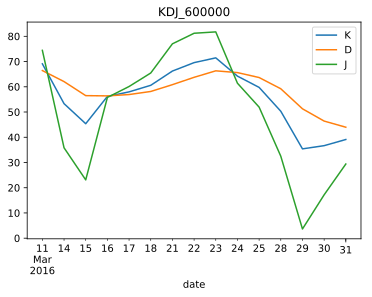

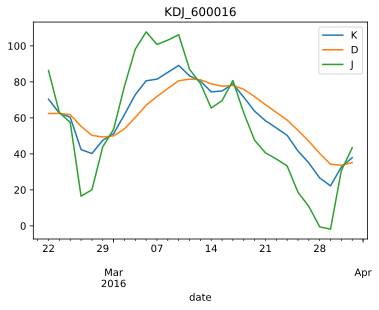

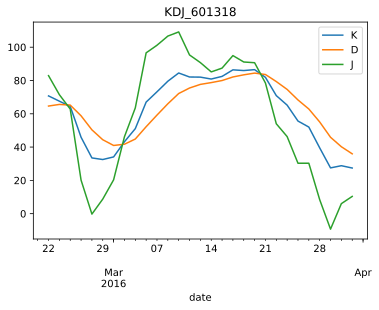

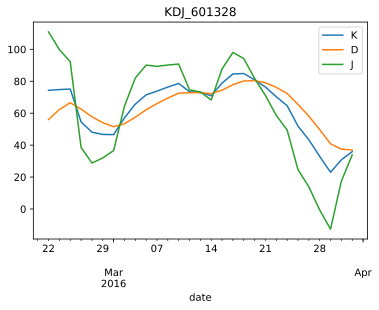

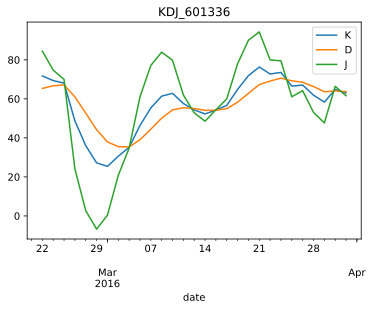

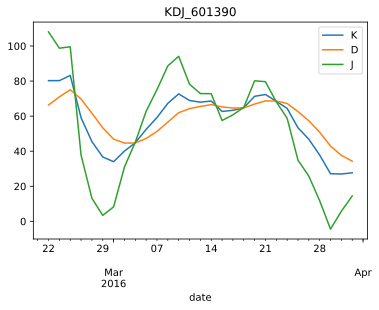

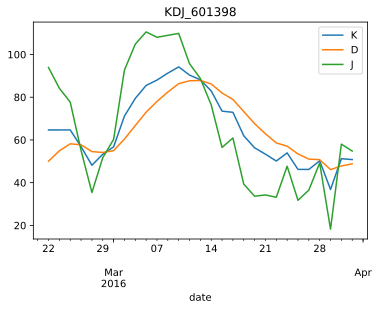

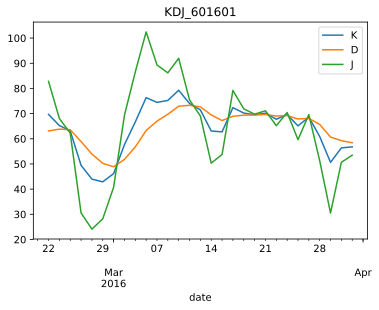

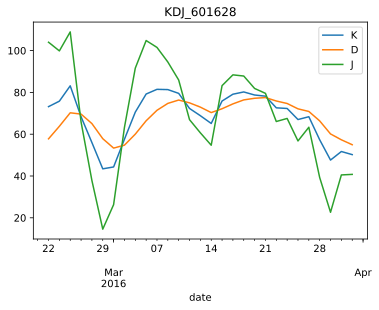

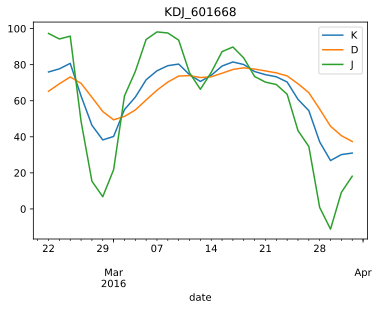

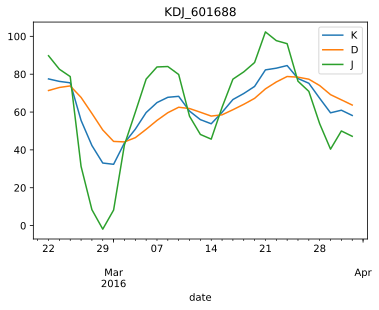

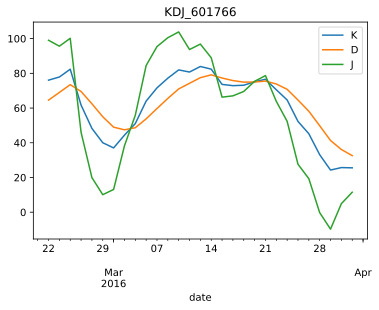

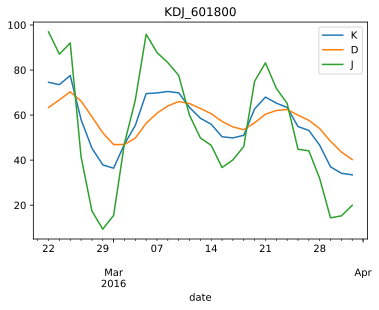

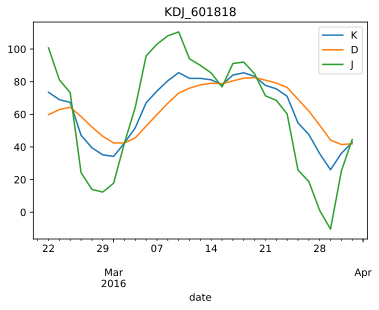

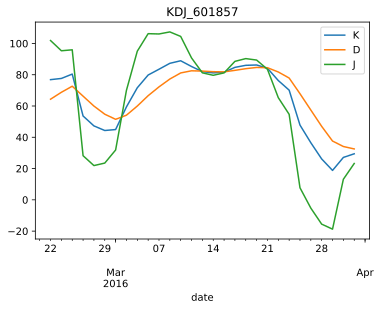

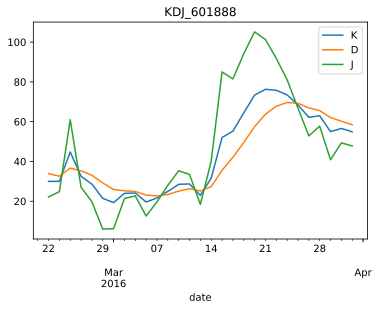

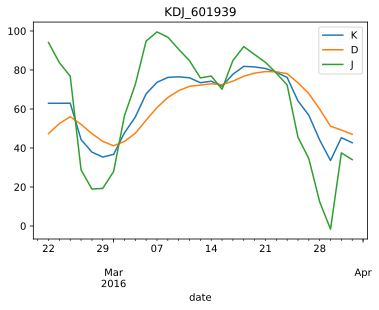

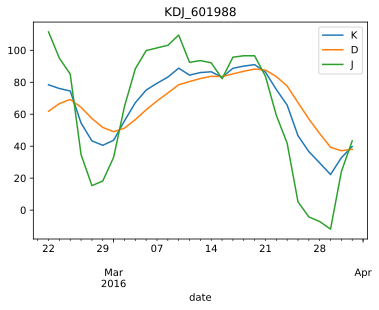

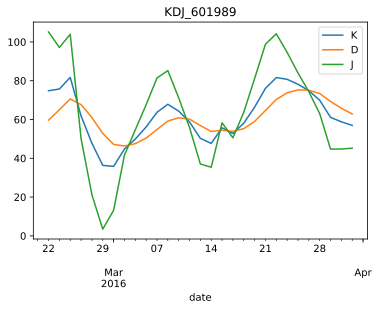

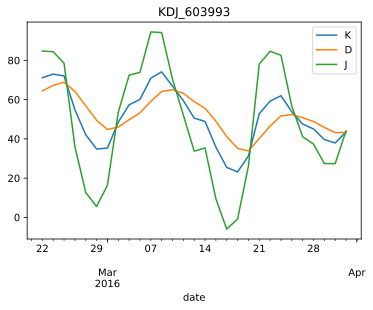

In [76]:
import os
path = r'./data/'

macds = []
for file in os.listdir(path):
    name = file.split('.')[0]
    if '~' in file : continue
    df = pd.read_excel(path+file)
    df.columns = ['date', 'date2', 'open', 'high', 'low', 'close', 'done', 'market_value', 'turnover', 'pe', 'pb']
    df.loc[:, 'date'] = pd.to_datetime(df.date)
    df = df.set_index('date')
    df = df.iloc[:, 1:]
    
    df['21d'] = np.round(df.close.rolling(window= 21).mean(), 2)
    low_list = df.low.rolling(window=9).min()
    high_list = df.high.rolling(window=9).max()
    rsv = (df['close'] - low_list) / (high_list - low_list) * 100
        
    df_data = pd.DataFrame()
    df_data['K'] = rsv.ewm(com=2).mean()
    df_data['D'] = df_data['K'].ewm(com=2).mean()
    df_data['J'] = 3 * df_data['K'] - 2 * df_data['D']
    df_data.index = df.index.values
    df_data.index.name = 'date'
    # 删除空数据
    df_data = df_data.dropna()
    # 计算KDJ指标金叉、死叉情况
    df_data['KDJ_金叉死叉'] = ''
    kdj_position = df_data['K'] > df_data['D']
    df_data.loc[kdj_position[(kdj_position == True) & (kdj_position.shift() == False)].index, 'KDJ_金叉死叉'] = '金叉'
    df_data.loc[kdj_position[(kdj_position == False) & (kdj_position.shift() == True)].index, 'KDJ_金叉死叉'] = '死叉'
    
    df_data = df_data['2016-2-21':'2016-3']
    df_data.plot(title='KDJ_'+name)

    

# stockstats RSI

/home/nocater/anaconda3/envs/ml/lib/python3.6/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


20 20


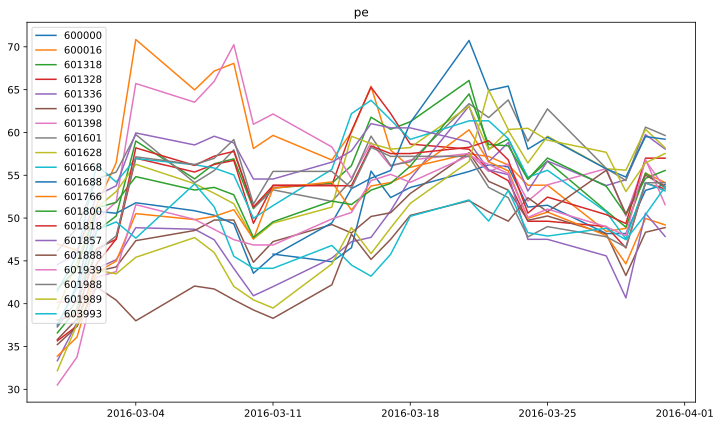

In [135]:
import os
import stockstats
from stockstats import StockDataFrame

path = r'./data/'

stocks = []
rsis = []
for file in os.listdir(path):
    if '~' in file : continue
    name = file.split('.')[0]
    stocks.append(name)

    df = pd.read_excel(path+file)
    df.columns = ['date', 'date2', 'open', 'high', 'low', 'close', 'done', 'market_value', 'turnover', 'pe', 'pb']
    df.loc[:, 'date'] = pd.to_datetime(df.date)
    df = df.set_index('date')
    df = df.iloc[:, 1:]
    
    stockstats_df = StockDataFrame.retype(df)
    stockstats_df['rsi'] = stockstats_df['rsi_14']
    stockstats_df = stockstats_df['2016-2-29':'2016-3']
    rsis.append(dict(zip(stockstats_df.index.values, stockstats_df.rsi.values)))
#     stockstats_df.rsi.plot(title='rsi_'+name)

print(len(stocks), len(rsis))
plt.figure(figsize=(12,7))
for i in range(20):
    plt.plot(rsis[i].keys(),rsis[i].values(),label=stocks[i])
plt.legend()
plt.title('pe')
plt.show()

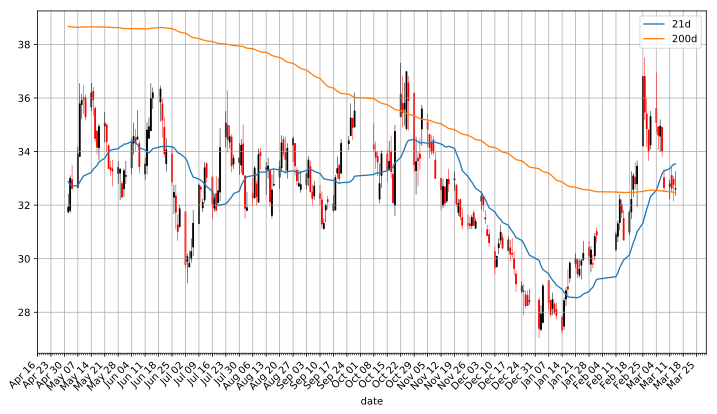

In [150]:
from matplotlib.dates import DateFormatter, WeekdayLocator,\
    DayLocator, MONDAY
# from matplotlib.finance import candlestick_ohlc
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates
from matplotlib.dates import date2num
 
def pandas_candlestick_ohlc(dat, stick = "day", otherseries = None):
    """
    :param dat: pandas DataFrame object with datetime64 index, and float columns "Open", "High", "Low", and "Close", likely created via DataReader from "yahoo"
    :param stick: A string or number indicating the period of time covered by a single candlestick. Valid string inputs include "day", "week", "month", and "year", ("day" default), and any numeric input indicates the number of trading days included in a period
    :param otherseries: An iterable that will be coerced into a list, containing the columns of dat that hold other series to be plotted as lines
 
    This will show a Japanese candlestick plot for stock data stored in dat, also plotting other series if passed.
    """
    mondays = WeekdayLocator(MONDAY)        # major ticks on the mondays
    alldays = DayLocator()              # minor ticks on the days
    dayFormatter = DateFormatter('%d')      # e.g., 12
 
    # Create a new DataFrame which includes OHLC data for each period specified by stick input
    transdat = dat.loc[:,["Open", "High", "Low", "Close"]]
    if (type(stick) == str):
        if stick == "day":
            plotdat = transdat
            stick = 1 # Used for plotting
        elif stick in ["week", "month", "year"]:
            if stick == "week":
                transdat["week"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[1]) # Identify weeks
            elif stick == "month":
                transdat["month"] = pd.to_datetime(transdat.index).map(lambda x: x.month) # Identify months
            transdat["year"] = pd.to_datetime(transdat.index).map(lambda x: x.isocalendar()[0]) # Identify years
            grouped = transdat.groupby(list(set(["year",stick]))) # Group by year and other appropriate variable
            plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
            for name, group in grouped:
                plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                            "High": max(group.High),
                                            "Low": min(group.Low),
                                            "Close": group.iloc[-1,3]},
                                           index = [group.index[0]]))
            if stick == "week": stick = 5
            elif stick == "month": stick = 30
            elif stick == "year": stick = 365
 
    elif (type(stick) == int and stick >= 1):
        transdat["stick"] = [np.floor(i / stick) for i in range(len(transdat.index))]
        grouped = transdat.groupby("stick")
        plotdat = pd.DataFrame({"Open": [], "High": [], "Low": [], "Close": []}) # Create empty data frame containing what will be plotted
        for name, group in grouped:
            plotdat = plotdat.append(pd.DataFrame({"Open": group.iloc[0,0],
                                        "High": max(group.High),
                                        "Low": min(group.Low),
                                        "Close": group.iloc[-1,3]},
                                       index = [group.index[0]]))
 
    else:
        raise ValueError('Valid inputs to argument "stick" include the strings "day", "week", "month", "year", or a positive integer')
 
 
    # Set plot parameters, including the axis object ax used for plotting
    fig, ax = plt.subplots(figsize=(12,7))
    fig.subplots_adjust(bottom=0.2)
    if plotdat.index[-1] - plotdat.index[0] < pd.Timedelta('730 days'):
        weekFormatter = DateFormatter('%b %d')  # e.g., Jan 12
        ax.xaxis.set_major_locator(mondays)
        ax.xaxis.set_minor_locator(alldays)
    else:
        weekFormatter = DateFormatter('%b %d, %Y')
    ax.xaxis.set_major_formatter(weekFormatter)
 
    ax.grid(True)
     
    # Create the candelstick chart
    candlestick_ohlc(ax, list(zip(list(date2num(plotdat.index.tolist())), plotdat["Open"].tolist(), plotdat["High"].tolist(),
                      plotdat["Low"].tolist(), plotdat["Close"].tolist())),
                      colorup = "black", colordown = "red", width = stick * .4)
 
    # Plot other series (such as moving averages) as lines
    if otherseries != None:
        if type(otherseries) != list:
            otherseries = [otherseries]
        dat.loc[:,otherseries].plot(ax = ax, lw = 1.3, grid = True)
 
    ax.xaxis_date()
    ax.autoscale_view()
    plt.setp(plt.gca().get_xticklabels(), rotation=45, horizontalalignment='right')
 
    plt.show()

    
    
path = r'./data/'

stocks = []
for file in os.listdir(path)[7:]:
    if '~' in file : continue
    name = file.split('.')[0]
    stocks.append(name)

    df = pd.read_excel(path+file)
    df.columns = ['date', 'date2', 'Open', 'High', 'Low', 'Close', 'done', 'market_value', 'turnover', 'pe', 'pb']
    df.loc[:, 'date'] = pd.to_datetime(df.date)
    df = df.set_index('date')
    df = df.iloc[:, 1:]
    
    df["21d"] = np.round(df["Close"].rolling(window = 21, center = False).mean(), 2)
    df["200d"] = np.round(df["Close"].rolling(window = 200, center = False).mean(), 2)
    pandas_candlestick_ohlc(df['2018-5':], otherseries=['21d','200d'])
    break

TypeError: cannot do index indexing on <class 'pandas.core.indexes.datetimes.DatetimeIndex'> with these indexers [-1] of <class 'int'>